In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#total ligne 423768
file_path = "C:/Users/PC HP 1/Desktop/2025-03-21/old_data/data_bundle_purchase_july2024_jan2025.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   periode  subscriber_id  revenu_furfait_data_dinar
0  2024/08     2170492947                      50.00
1  2024/07     2173421811                       0.00
2  2024/11     2173963389                      23.75
3  2024/12     2144268162                      10.00
4  2024/12     2180364897                       0.00

Missing Values:
periode                      0
subscriber_id                0
revenu_furfait_data_dinar    0
dtype: int64

Basic Statistics:
       subscriber_id  revenu_furfait_data_dinar
count   7.854990e+05              785499.000000
mean    1.833095e+09                  15.921292
std     7.729327e+08                  29.838337
min     2.420000e+02                  -0.500000
25%     2.143979e+09                   2.000000
50%     2.157714e+09                   8.000000
75%     2.174274e+09                  23.750000
max     2.180692e+09                4294.000000


In [33]:
columns = [
    'revenu_furfait_data_dinar',
]

for col in columns:
    unique_values = df[col].dropna().unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(unique_values)  # show all unique values
    print("-" * 80)

revenu_furfait_data_dinar: 24739 unique values
[5.000000e+01 0.000000e+00 2.375000e+01 ... 1.626875e+03 1.560000e+00
 6.017500e+01]
--------------------------------------------------------------------------------


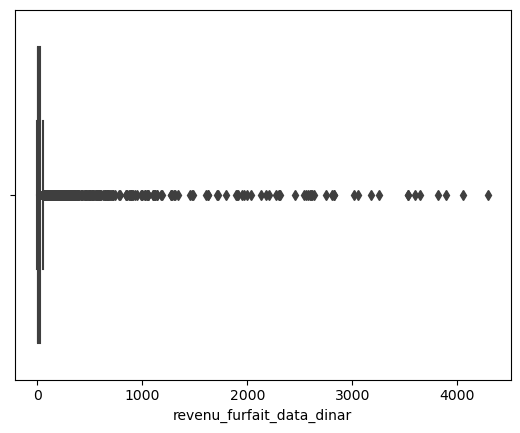

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['revenu_furfait_data_dinar'])
plt.show()

In [35]:
Q1 = df['revenu_furfait_data_dinar'].quantile(0.25)
Q3 = df['revenu_furfait_data_dinar'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['revenu_furfait_data_dinar'] = df['revenu_furfait_data_dinar'].clip(lower=lower_bound, upper=upper_bound)

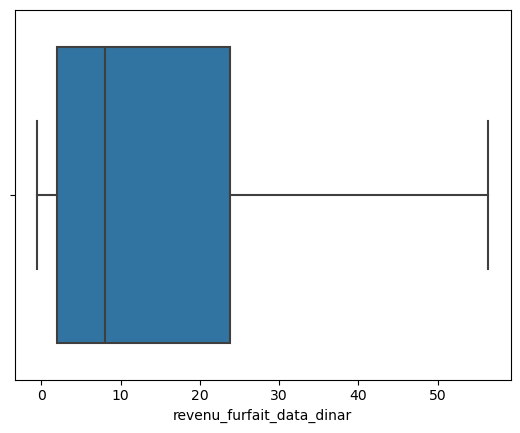

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['revenu_furfait_data_dinar'])
plt.show()

In [37]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   periode  subscriber_id  revenu_furfait_data_dinar
0  2024/08     2170492947                      50.00
1  2024/07     2173421811                       0.00
2  2024/11     2173963389                      23.75
3  2024/12     2144268162                      10.00
4  2024/12     2180364897                       0.00

Missing Values:
periode                      0
subscriber_id                0
revenu_furfait_data_dinar    0
dtype: int64

Basic Statistics:
       subscriber_id  revenu_furfait_data_dinar
count   7.854990e+05               785499.00000
mean    1.833095e+09                   14.64330
std     7.729327e+08                   16.01738
min     2.420000e+02                   -0.50000
25%     2.143979e+09                    2.00000
50%     2.157714e+09                    8.00000
75%     2.174274e+09                   23.75000
max     2.180692e+09                   56.37500


In [38]:
df = df[df['revenu_furfait_data_dinar'] >= 0]
# OR, if you want to cap it to 0
df['revenu_furfait_data_dinar'] = df['revenu_furfait_data_dinar'].clip(lower=0)

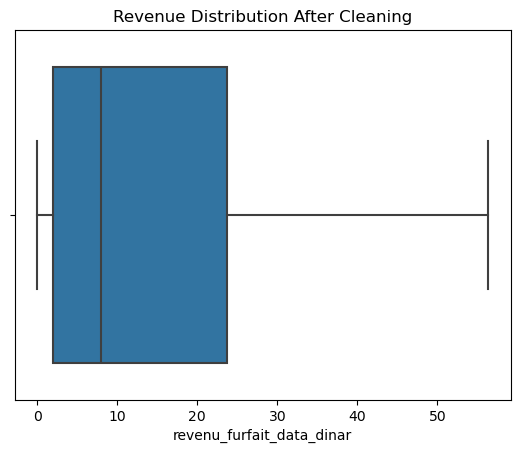

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['revenu_furfait_data_dinar'])
plt.title("Revenue Distribution After Cleaning")
plt.show()


In [40]:
columns = [
    'revenu_furfait_data_dinar',
]

for col in columns:
    unique_values = df[col].dropna().unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(unique_values)  # show all unique values
    print("-" * 80)

revenu_furfait_data_dinar: 17376 unique values
[50.      0.     23.75   ...  7.5075 13.1225  1.56  ]
--------------------------------------------------------------------------------


In [41]:
df.duplicated().sum()

0

In [42]:
#normalize the numeric column : revenu_furfait_data_dinar

In [43]:
# Ajouter une nouvelle colonne avec la moyenne du revenu par subscriber_id
df['revenu_furfait_data_dinar_moyen'] = df.groupby('subscriber_id')['revenu_furfait_data_dinar'].transform('mean')

In [44]:
df = df.drop(columns=['periode'])
df = df.drop(columns=['revenu_furfait_data_dinar'])
# Vérification
print(df.head(10))

   subscriber_id  revenu_furfait_data_dinar_moyen
0     2170492947                        43.189286
1     2173421811                         0.000000
2     2173963389                        31.182143
3     2144268162                        12.857143
4     2180364897                         0.000000
5     2145228642                        11.314286
6     2177793573                        19.348214
7     2174554869                         4.683333
8     2162477306                         4.750000
9     2142976459                        21.166667


In [46]:
#save after changes 
df.to_csv('cleaned_data_bundle_purchase_ooredoo.csv', index=False)